In [1]:
import pickle
import pandas as pd
import os
from explainers.dce import DistributionalCounterfactualExplainer
import torch
from utils.visualization import *
from utils.data_processing import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


pd.set_option('display.max_columns', None)

%reload_ext autoreload
%autoreload 2

c:\Users\leiyo\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
DEBUG:root:test


In [2]:
data_path = 'data/german_credit'

In [3]:
df_ = pd.read_csv(os.path.join(data_path, 'german_credit_data.csv'))
df = df_.copy()

In [4]:
df.sample(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
475,26,female,2,rent,little,little,3114,18,furniture/equipment,bad
747,37,female,1,own,little,little,1274,12,car,bad
383,26,male,2,own,little,rich,1330,12,car,good
501,42,male,2,free,little,little,5493,36,car,good
587,21,male,1,own,little,little,1289,12,furniture/equipment,good


In [5]:
df, label_mappings = feature_encoding(df=df, target_name='Risk', target_encode_dict={"good": 0, "bad": 1})

In [6]:
factual = pd.read_csv(os.path.join(data_path,'factual.csv'))
counterfactual = pd.read_csv(os.path.join(data_path,'counterfactual.csv'))

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname

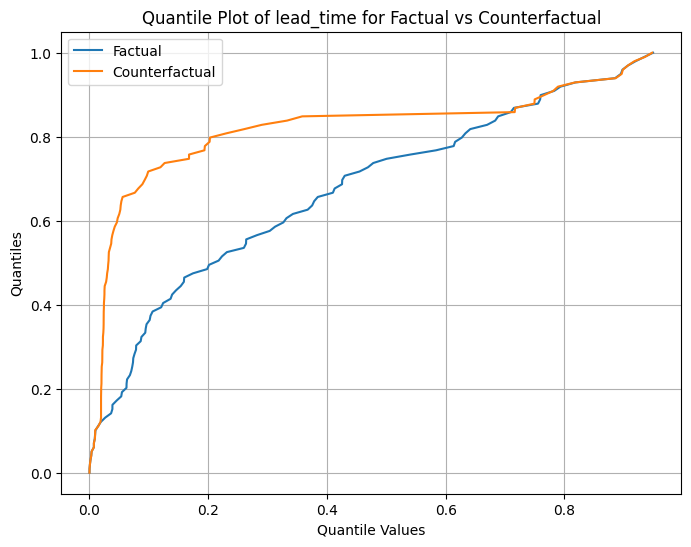

In [7]:
plot_quantile(factual=factual, counterfactual=counterfactual, column_name='Risk');

In [8]:
factual.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,39,male,2,own,little,Unknown,1473,18,radio/TV,0.072231
1,54,male,2,own,little,little,3051,48,domestic appliances,0.919690
2,27,male,2,own,quite rich,moderate,2326,15,business,0.062517
3,40,male,1,own,little,moderate,1155,12,radio/TV,0.086446
4,36,male,2,own,Unknown,Unknown,3079,36,car,0.153896
5,35,male,1,own,moderate,little,4380,18,car,0.063506
6,25,female,1,own,little,moderate,1355,24,car,0.818434
7,24,female,2,rent,little,little,652,12,furniture/equipment,0.782674
8,24,male,1,own,Unknown,little,3763,21,car,0.384604
9,32,male,2,rent,moderate,moderate,11760,39,education,0.934350


In [9]:
counterfactual.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,39,male,2,own,little,Unknown,1442,17,radio/TV,0.024060
1,54,male,2,own,little,little,3029,48,domestic appliances,0.917797
2,27,male,2,own,quite rich,moderate,2586,14,business,0.036830
3,40,male,1,own,little,moderate,1385,10,radio/TV,0.047721
4,36,male,2,own,Unknown,Unknown,3169,36,car,0.021801
5,36,male,1,own,moderate,little,4472,17,car,0.023908
6,25,female,1,own,little,moderate,1332,24,car,0.817890
7,24,female,2,rent,little,little,662,12,furniture/equipment,0.781138
8,25,male,1,own,Unknown,little,4104,17,car,0.119727
9,32,male,2,rent,moderate,moderate,11766,39,education,0.935408


In [10]:
interval = (0, 25, 35, 65, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)

for cat in cats:
    risk_prob = df[df.Age_cat == cat]['Risk'].mean()
    print(f'Risk {cat}: {risk_prob}')

Risk Student: 0.42105263157894735
Risk Young: 0.2964824120603015
Risk Adult: 0.24619289340101522
Risk Senior: 0.2777777777777778


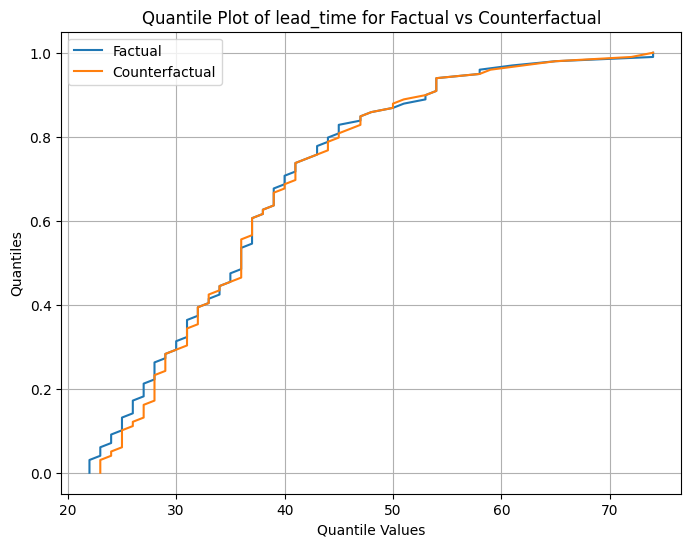

In [11]:
plot_quantile(factual=factual, counterfactual=counterfactual, column_name='Age');

In [12]:
factual['Risk'].mean(), counterfactual['Risk'].mean()

(0.3130257116629, 0.17500146086469998)

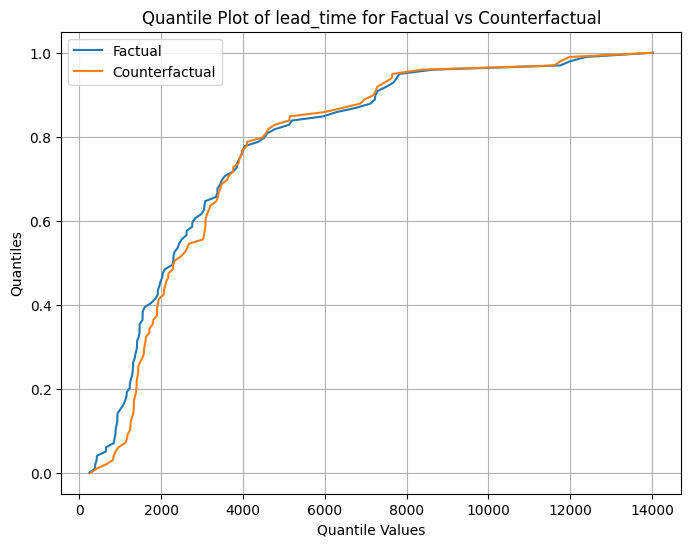

In [13]:
plot_quantile(factual=factual, counterfactual=counterfactual, column_name='Credit amount');

In [14]:
print('Risk Low credit amount:', df[df['Credit amount']<1000]['Risk'].mean())
print('Risk Middle credit amount:', df[ (df['Credit amount']>=1000) & (df['Credit amount']<=6000) ]['Risk'].mean())
print('Risk High credit amount:', df[df['Credit amount']>6000]['Risk'].mean())

Risk Low credit amount: 0.31896551724137934
Risk Middle credit amount: 0.2653061224489796
Risk High credit amount: 0.4563758389261745


In [15]:
df[df['Credit amount']<1000].sample(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
529,41,1,1,1,1,1,662,6,1,0,Adult
752,23,0,1,2,2,2,841,12,0,0,Student
579,27,1,1,1,1,0,937,24,3,0,Young
220,26,1,1,1,1,2,625,12,5,0,Young
601,30,0,2,1,1,2,918,9,4,1,Young
184,36,1,2,1,1,2,884,18,1,1,Adult
732,44,0,1,1,1,2,760,8,5,0,Adult
472,28,1,1,1,1,1,654,9,1,1,Young
422,47,1,1,1,1,2,958,12,1,0,Adult
515,37,0,2,1,1,1,609,6,1,0,Adult


In [16]:
factual[ (factual['Credit amount']>=1000) & (factual['Credit amount']<=6000) ]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,39,male,2,own,little,Unknown,1473,18,radio/TV,0.072231
1,54,male,2,own,little,little,3051,48,domestic appliances,0.919690
2,27,male,2,own,quite rich,moderate,2326,15,business,0.062517
3,40,male,1,own,little,moderate,1155,12,radio/TV,0.086446
4,36,male,2,own,Unknown,Unknown,3079,36,car,0.153896
...,...,...,...,...,...,...,...,...,...,...
92,74,female,3,free,little,moderate,5129,9,car,0.378536
94,54,male,2,own,rich,moderate,1318,12,car,0.026822
95,30,male,3,own,little,moderate,5965,27,car,0.410081
96,44,male,2,own,quite rich,Unknown,1163,12,car,0.001928


In [17]:
factual['Risk'].mean()

0.3130257116629

In [18]:
counterfactual['Risk'].mean()

0.17500146086469998

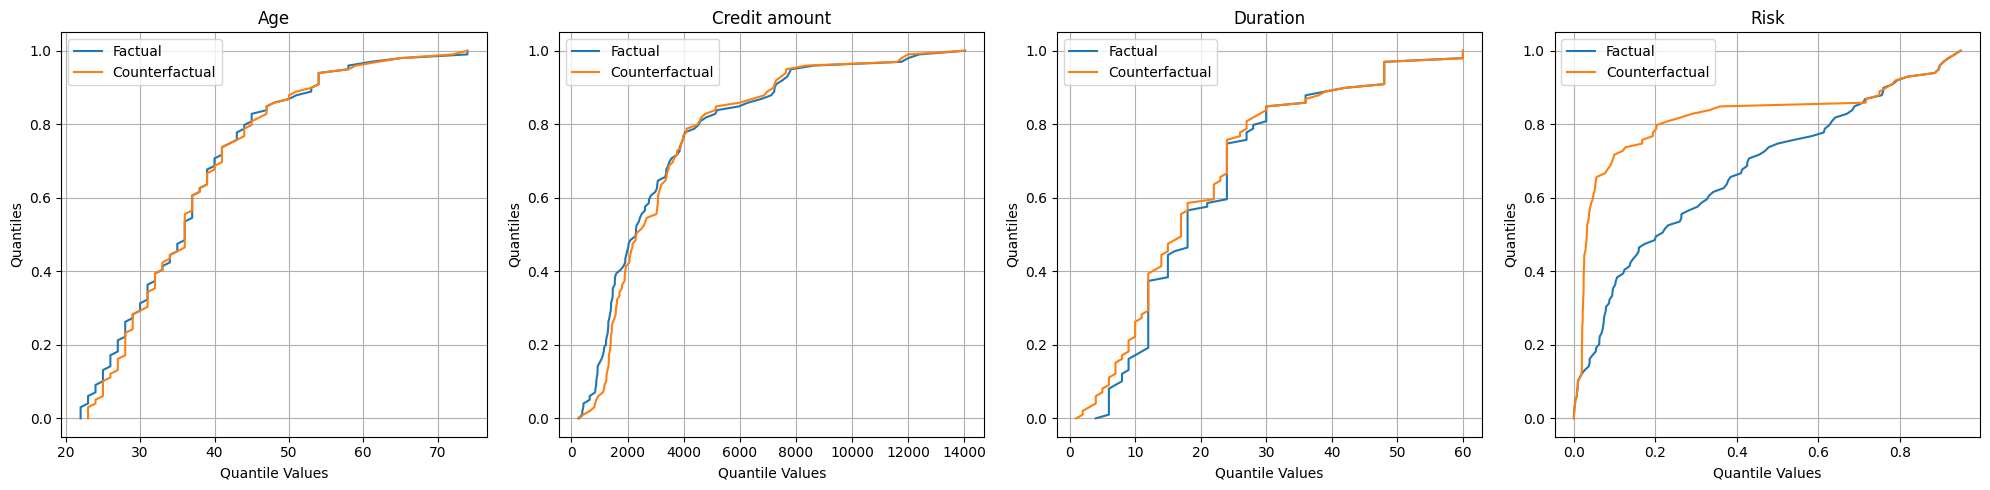

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname

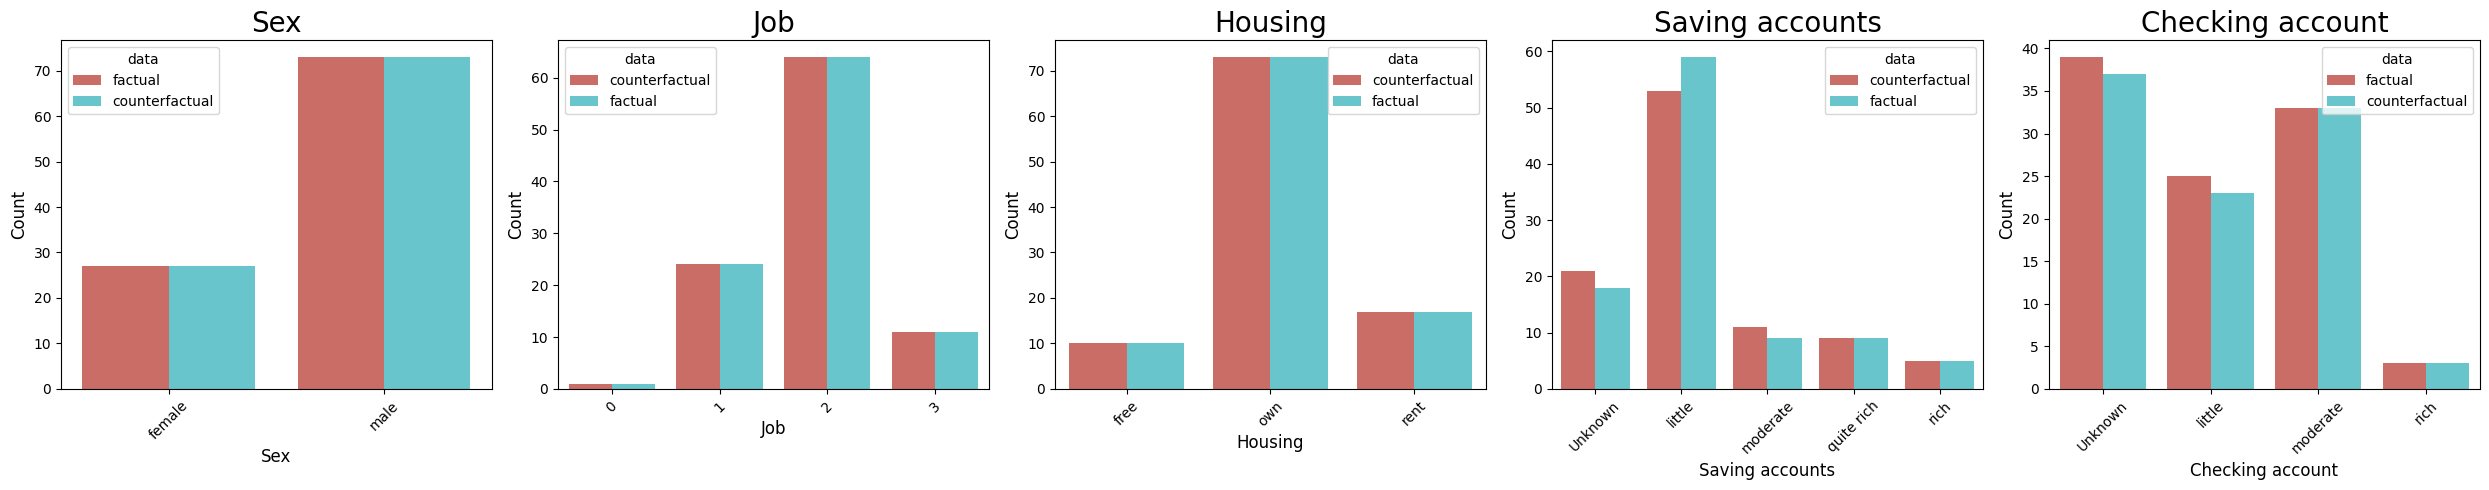

In [19]:
factual['data'] = 'factual'
counterfactual['data'] = 'counterfactual'

fcf = pd.concat([factual, counterfactual])

def plot_quantile_ax(factual, counterfactual, column_name):
    quantiles_factual = factual[column_name].quantile(np.linspace(0, 1, 100))
    quantiles_counterfactual = counterfactual[column_name].quantile(np.linspace(0, 1, 100))

    # Plot quantiles
    plt.plot(quantiles_factual.values, np.linspace(0, 1, 100), label="Factual")
    plt.plot(quantiles_counterfactual.values, np.linspace(0, 1, 100), label="Counterfactual")
    plt.xlabel("Quantile Values")
    plt.ylabel("Quantiles")
    plt.title(f"{column_name}")
    plt.legend()
    plt.grid(True)

# Assuming factual and counterfactual are pandas DataFrames with the same columns
columns = ['Age', 'Credit amount', 'Duration', 'Risk']

# Create a 3x4 subplot layout
plt.figure(figsize=(20, 5))
for i, column in enumerate(columns):
    plt.subplot(1, 4, i+1)
    plot_quantile_ax(factual, counterfactual, column)

plt.tight_layout()
plt.show()

def hist_plot_ax(df, x, hue, title, ax):
    g = sns.countplot(x=x, hue=hue, data=df.sort_values(by=x), palette="hls", ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=45)
    g.set_xlabel(x, fontsize=12)
    g.set_ylabel("Count", fontsize=12)
    g.set_title(title, fontsize=20)


columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account']

factual['is_cf'] = False
counterfactual['is_cf'] = True

fcf = pd.concat([factual, counterfactual])

# Create a 3x4 subplot layout
plt.figure(figsize=(25, 5))
for i, column in enumerate(columns):
    ax = plt.subplot(1, 5, i+1)
    hist_plot_ax(fcf, column, 'data', column, ax)

plt.tight_layout()
plt.show()

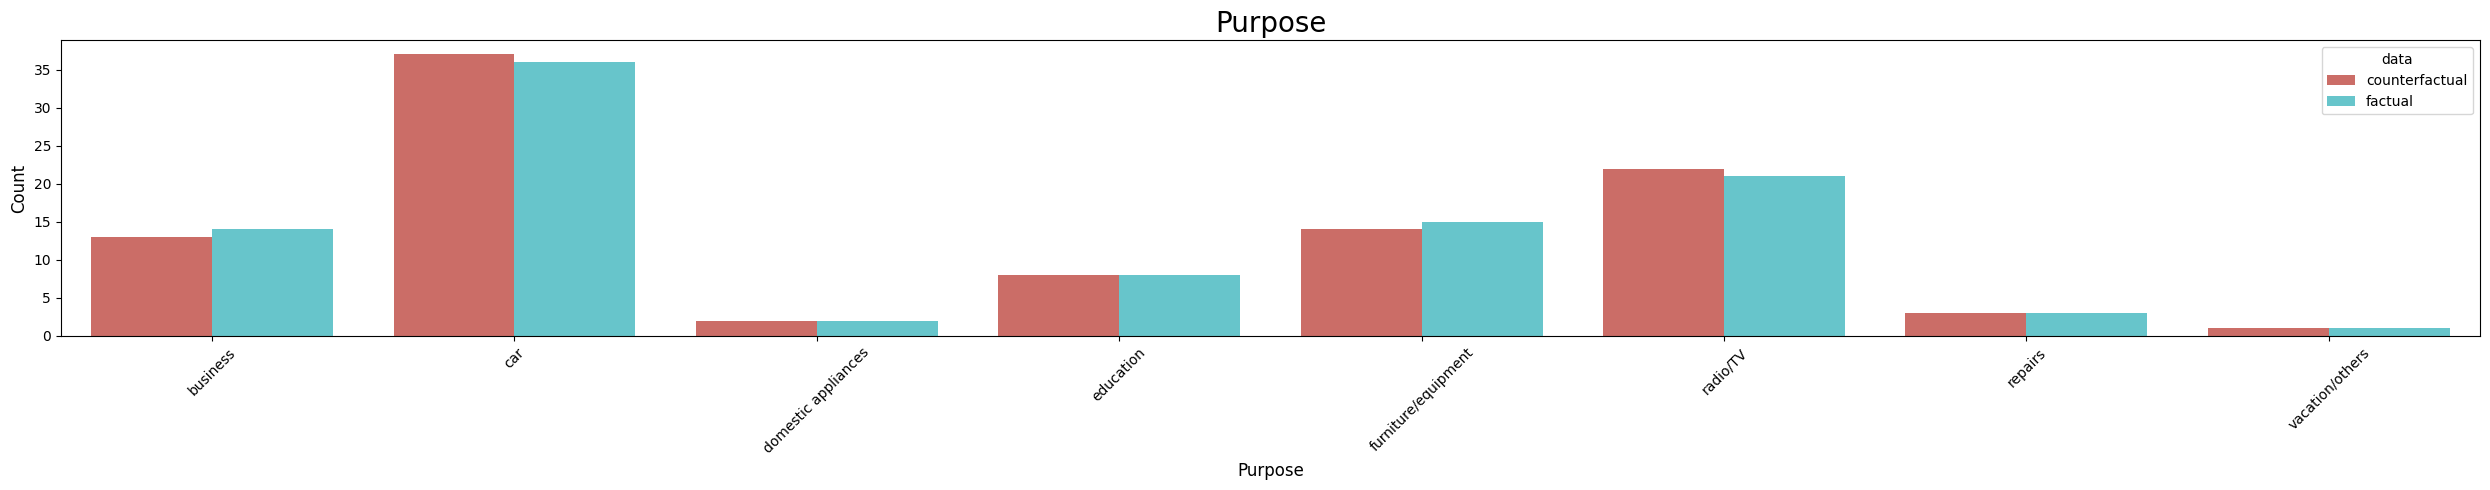

In [20]:
fig, ax = plt.subplots(figsize=(25,5))

hist_plot_ax(fcf, 'Purpose', 'data', 'Purpose', ax)

plt.tight_layout()
plt.show()

In [21]:
column_name = 'Risk'
quantiles_factual = factual[column_name].quantile(np.linspace(0, 1, 100))
quantiles_counterfactual = counterfactual[column_name].quantile(np.linspace(0, 1, 100))

In [22]:
s_factual = ""
for k, v in quantiles_factual.to_dict().items():
    s_factual += f" ({np.round(v,6)},{np.round(k,6)})"
print(s_factual)

 (0.000206,0.0) (0.000363,0.010101) (0.001001,0.020202) (0.001928,0.030303) (0.003202,0.040404) (0.003832,0.050505) (0.007581,0.060606) (0.007664,0.070707) (0.009124,0.080808) (0.009632,0.090909) (0.010335,0.10101) (0.014805,0.111111) (0.019517,0.121212) (0.026822,0.131313) (0.036625,0.141414) (0.038807,0.151515) (0.038896,0.161616) (0.045884,0.171717) (0.053714,0.181818) (0.054917,0.191919) (0.062517,0.20202) (0.062695,0.212121) (0.063506,0.222222) (0.068304,0.232323) (0.070695,0.242424) (0.072231,0.252525) (0.073494,0.262626) (0.073965,0.272727) (0.076062,0.282828) (0.078589,0.292929) (0.078857,0.30303) (0.086446,0.313131) (0.087687,0.323232) (0.09414,0.333333) (0.094927,0.343434) (0.096309,0.353535) (0.101598,0.363636) (0.102985,0.373737) (0.106526,0.383838) (0.120993,0.393939) (0.124236,0.40404) (0.13681,0.414141) (0.139389,0.424242) (0.145988,0.434343) (0.153896,0.444444) (0.159166,0.454545) (0.159771,0.464646) (0.174521,0.474747) (0.198398,0.484848) (0.201492,0.494949) (0.217658,

In [23]:
s_counterfactual = ""
for k, v in quantiles_counterfactual.to_dict().items():
    s_counterfactual += f" ({np.round(v,6)},{np.round(k,6)})"
print(s_counterfactual)

 (0.000194,0.0) (0.000359,0.010101) (0.001015,0.020202) (0.001874,0.030303) (0.003196,0.040404) (0.003813,0.050505) (0.00761,0.060606) (0.007648,0.070707) (0.009343,0.080808) (0.009788,0.090909) (0.009795,0.10101) (0.015242,0.111111) (0.01882,0.121212) (0.019678,0.131313) (0.019688,0.141414) (0.019691,0.151515) (0.019695,0.161616) (0.019695,0.171717) (0.019704,0.181818) (0.019857,0.191919) (0.019948,0.20202) (0.020416,0.212121) (0.020465,0.222222) (0.02052,0.232323) (0.020699,0.242424) (0.020852,0.252525) (0.021711,0.262626) (0.021801,0.272727) (0.02187,0.282828) (0.021971,0.292929) (0.022751,0.30303) (0.022872,0.313131) (0.022872,0.323232) (0.023535,0.333333) (0.023908,0.343434) (0.02406,0.353535) (0.024105,0.363636) (0.024169,0.373737) (0.024231,0.383838) (0.024532,0.393939) (0.024567,0.40404) (0.025099,0.414141) (0.025427,0.424242) (0.025477,0.434343) (0.025858,0.444444) (0.028255,0.454545) (0.029312,0.464646) (0.029968,0.474747) (0.031175,0.484848) (0.031666,0.494949) (0.032357,0.5

In [24]:
column_name = 'Purpose'
factual[column_name].value_counts()

Purpose
car                    36
radio/TV               21
furniture/equipment    15
business               14
education               8
repairs                 3
domestic appliances     2
vacation/others         1
Name: count, dtype: int64

In [25]:
counterfactual[column_name].value_counts()

Purpose
car                    37
radio/TV               22
furniture/equipment    14
business               13
education               8
repairs                 3
domestic appliances     2
vacation/others         1
Name: count, dtype: int64

In [26]:
factual.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'data', 'is_cf'],
      dtype='object')

In [27]:
column_name = 'Purpose'
pd.concat(
    [
        pd.DataFrame(factual.groupby(column_name)['Risk'].mean()).rename({'Risk': 'Risk_factual'}, axis=1),
        pd.DataFrame(counterfactual.groupby(column_name)['Risk'].mean()).rename({'Risk': 'Risk_counterfactual'}, axis=1)
    ],
    axis=1,
)

,Risk_factual,Risk_counterfactual
Purpose,,
business,0.352393,0.204062
car,0.330718,0.156633
domestic appliances,0.461446,0.460496
education,0.329091,0.166482
furniture/equipment,0.278134,0.140084
radio/TV,0.272038,0.175539
repairs,0.327961,0.318689
vacation/others,0.038896,0.019948


In [28]:
column_name = 'Saving accounts'
indice = factual[(factual[column_name] != counterfactual[column_name])].index

factual.loc[indice]


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,data,is_cf
10,43,male,2,rent,little,little,2625,16,car,0.500605,factual,False
24,31,female,2,own,little,little,1957,6,radio/TV,0.303706,factual,False
37,53,male,2,free,little,little,7119,48,furniture/equipment,0.469166,factual,False
54,45,male,1,own,little,little,4006,28,car,0.683338,factual,False
55,40,male,2,rent,Unknown,Unknown,7824,28,car,0.331893,factual,False
78,42,male,2,free,little,moderate,6288,60,education,0.413037,factual,False
82,34,male,2,own,little,little,3965,42,radio/TV,0.429980,factual,False


In [29]:
counterfactual.loc[indice]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,data,is_cf
10,45,male,2,rent,moderate,little,2489,10,car,0.025858,counterfactual,True
24,33,female,2,own,Unknown,little,2684,3,radio/TV,0.032357,counterfactual,True
37,51,male,2,free,Unknown,little,6976,48,radio/TV,0.032866,counterfactual,True
54,47,male,1,own,moderate,Unknown,4563,22,car,0.025099,counterfactual,True
55,41,male,2,rent,NaN,Unknown,7472,27,car,0.024567,counterfactual,True
78,41,male,2,free,Unknown,moderate,5993,60,education,0.040573,counterfactual,True
82,33,male,2,own,Unknown,little,3613,42,radio/TV,0.031666,counterfactual,True


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001F73DAB30A0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001F74E4AE5B0>


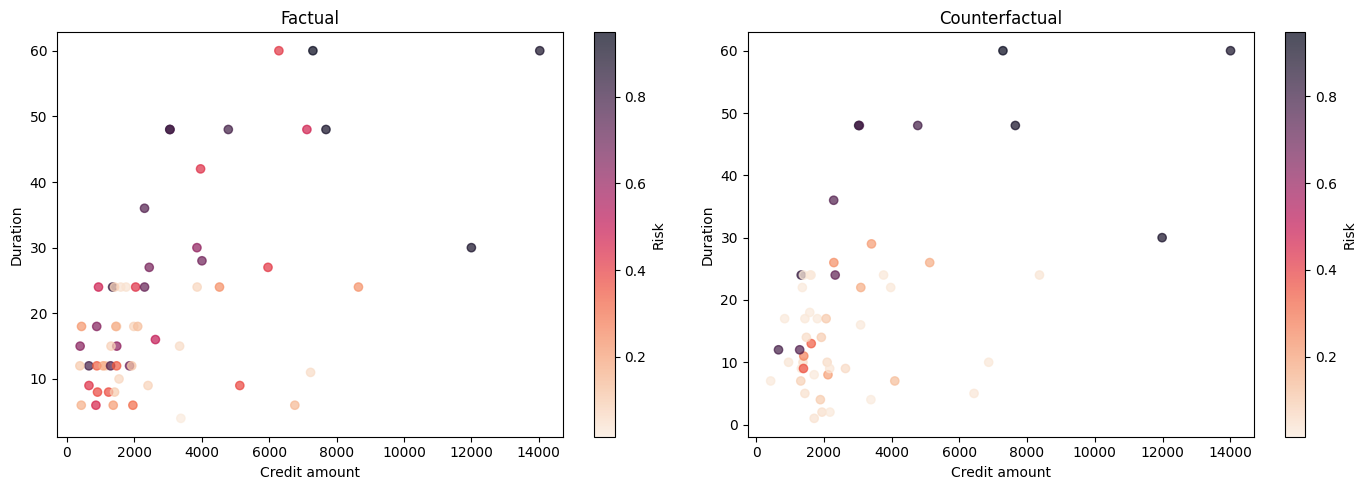

In [30]:
def colorful_scatter(df, x, y, color_col, title, ax):
    scatter = ax.scatter(df[x], df[y], alpha=0.7, c=df[color_col], cmap='rocket_r')

    # Adding colorbar to show the scale
    plt.colorbar(scatter, ax=ax, label=color_col)

    # Adding labels and title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))  # Create 1 row, 2 columns of subplots

# Assuming 'df' is your DataFrame and it already contains the columns 'Credit amount', 'Duration', and 'Risk'
# Call the function with the respective axes object
colorful_scatter(factual[factual['Saving accounts']=='little'], 'Credit amount', 'Duration', 'Risk', 'Factual', ax1)
colorful_scatter(counterfactual[counterfactual['Saving accounts']=='little'], 'Credit amount', 'Duration', 'Risk', 'Counterfactual', ax2)

plt.tight_layout()  # Adjust the layout
plt.show()

In [31]:
factual[ 
    (factual['Credit amount']>=1000) & (factual['Credit amount']<=5000) 
  & (factual['Duration']>=0) & (factual['Duration']<=35) 
  & (factual['Age']>=30) & (factual['Age']<=50) 
].shape

(35, 12)

In [32]:
counterfactual[ 
    (counterfactual['Credit amount']>=1000) & (counterfactual['Credit amount']<=5000) 
  & (counterfactual['Duration']>=0) & (counterfactual['Duration']<=35) 
  & (counterfactual['Age']>=30) & (counterfactual['Age']<=50) 
].shape

(40, 12)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001F73DB56FA0>
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='n

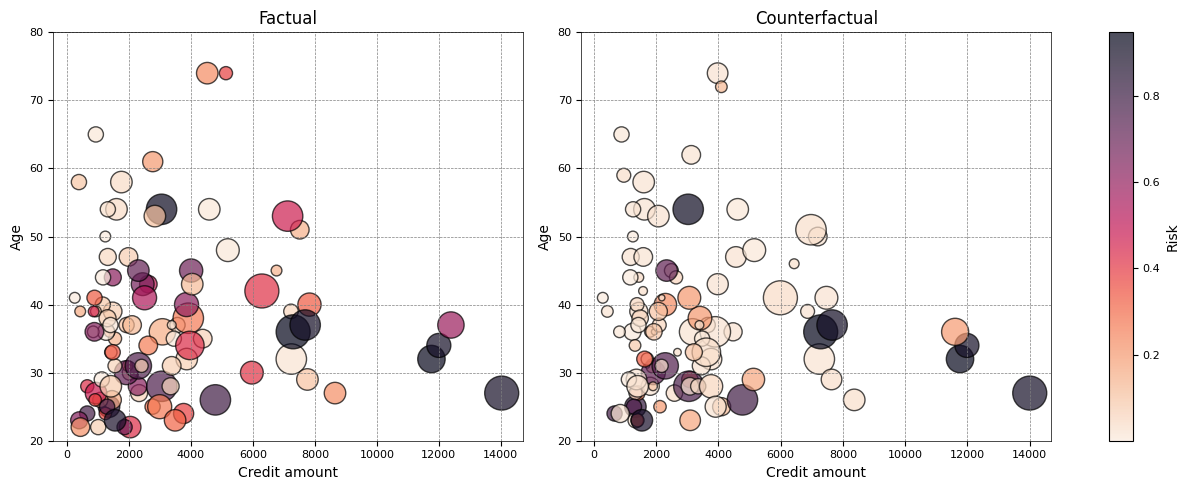

In [33]:
# Enable LaTeX text rendering in Matplotlib
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif"
# })


def colorful_scatter_with_sizing(df, x, y, size_col, color_col, title, ax, show_colorbar=True, cbar_ax=None):
    scatter = ax.scatter(df[x], df[y], s=df[size_col]*10, alpha=0.7, c=df[color_col], cmap='rocket_r', edgecolor='black')

    # Adding colorbar conditionally
    if show_colorbar and cbar_ax is not None:
        cbar = plt.colorbar(scatter, cax=cbar_ax, label=color_col)
        cbar.ax.tick_params(labelsize=8)  # Smaller labels to mimic TikZ

    # Adding labels and title
    ax.set_xlabel(x, fontsize=10)
    ax.set_ylabel(y, fontsize=10)
    ax.set_title(title, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Grid lines like TikZ
    ax.set_facecolor('white')  # White background like TikZ
    ax.set_ylim(20,80)

    # Make sure the spines (frame) are visible
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(0.5)

# Create a GridSpec with 2 columns with the second column being slightly narrower for the colorbar
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05])

# Create the two subplots and the colorbar axis
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
cbar_ax = fig.add_subplot(gs[2])

# Call the function with the axes object
colorful_scatter_with_sizing(factual, 'Credit amount', 'Age', 'Duration', 'Risk', 'Factual', ax1, show_colorbar=False)
colorful_scatter_with_sizing(counterfactual, 'Credit amount', 'Age', 'Duration', 'Risk', 'Counterfactual', ax2, cbar_ax=cbar_ax)

# Adjust the layout so there's no extra space
plt.tight_layout()

# Display the plot
plt.show()

In [408]:
factual['Risk'].mean()

0.3130257116629

In [412]:
factual

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,39,male,2,own,little,Unknown,1473,18,radio/TV,0.072231
1,54,male,2,own,little,little,3051,48,domestic appliances,0.919690
2,27,male,2,own,quite rich,moderate,2326,15,business,0.062517
3,40,male,1,own,little,moderate,1155,12,radio/TV,0.086446
4,36,male,2,own,Unknown,Unknown,3079,36,car,0.153896
...,...,...,...,...,...,...,...,...,...,...
95,30,male,3,own,little,moderate,5965,27,car,0.410081
96,44,male,2,own,quite rich,Unknown,1163,12,car,0.001928
97,29,female,2,rent,rich,moderate,7758,24,car,0.101598
98,37,female,2,rent,little,little,7685,48,business,0.907074


In [409]:
counterfactual['Risk'].mean()

0.17500146086469998

In [201]:
locations = [4,5,10,18,69]
factual[factual['Purpose']=='car'].loc[locations]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,data,is_cf
4,36,male,2,own,Unknown,Unknown,3079,36,car,0.153896,factual,False
5,35,male,1,own,moderate,little,4380,18,car,0.063506,factual,False
10,43,male,2,rent,little,little,2625,16,car,0.500605,factual,False
18,28,female,2,own,moderate,moderate,2278,18,car,0.627164,factual,False
69,40,male,3,own,little,little,3857,30,car,0.613443,factual,False


In [298]:
counterfactual[counterfactual['Purpose']=='car'].loc[locations]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,data,is_cf
4,36,male,2,own,Unknown,Unknown,3169,36,car,0.021801,counterfactual,True
5,36,male,1,own,moderate,little,4472,17,car,0.023908,counterfactual,True
10,45,male,2,rent,moderate,little,2489,10,car,0.025858,counterfactual,True
18,29,female,2,own,moderate,moderate,3083,14,car,0.290197,counterfactual,True
69,38,male,3,own,little,Unknown,3407,29,car,0.202492,counterfactual,True


In [225]:
factual.groupby('Saving accounts')['Risk'].mean()

Saving accounts
Unknown       0.167109
little        0.395192
moderate      0.504113
quite rich    0.025870
rich          0.041689
Name: Risk, dtype: float64

In [226]:
counterfactual.groupby('Saving accounts')['Risk'].mean()

Saving accounts
Unknown       0.042100
little        0.248309
moderate      0.295145
quite rich    0.011064
rich          0.016987
Name: Risk, dtype: float64

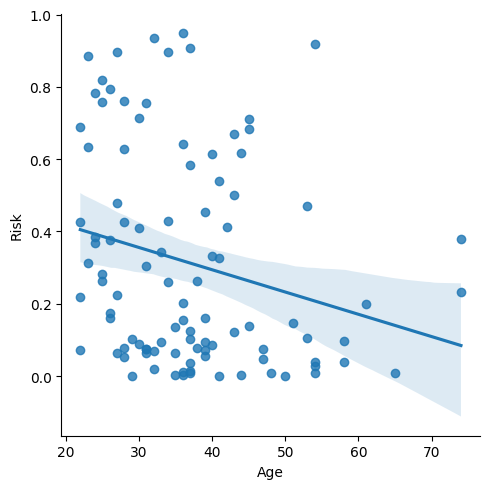

In [209]:
sns.lmplot(x='Age',y='Risk',data=factual,fit_reg=True);

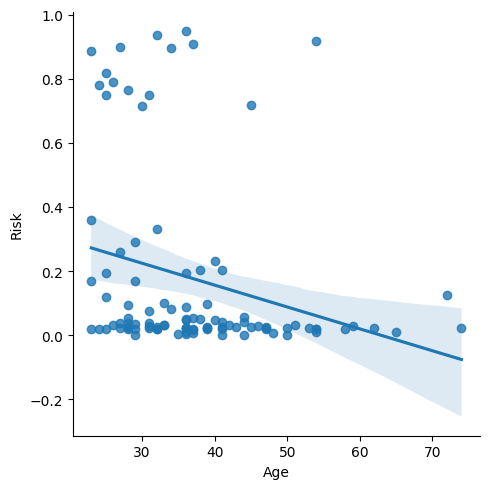

In [210]:
sns.lmplot(x='Age',y='Risk',data=counterfactual,fit_reg=True);

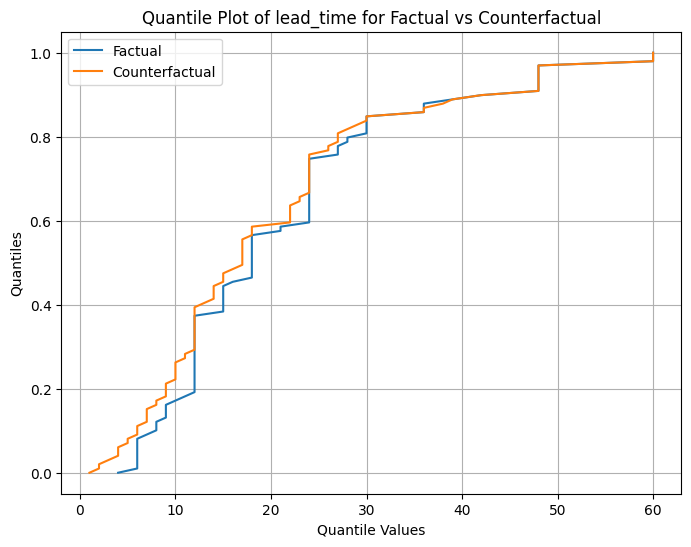

In [25]:
plot_quantile(factual=factual, counterfactual=counterfactual, column_name='Duration');

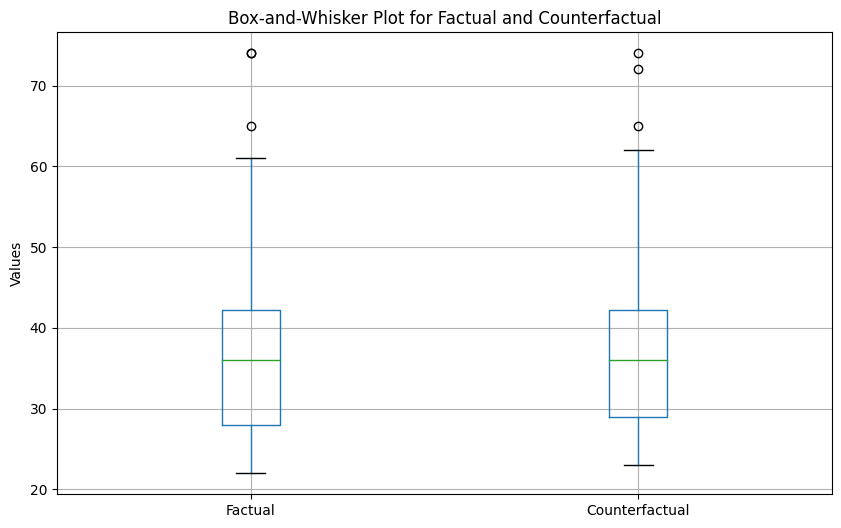

In [26]:
plot_box_whisker(factual=factual, counterfactual=counterfactual, column_name='Age')

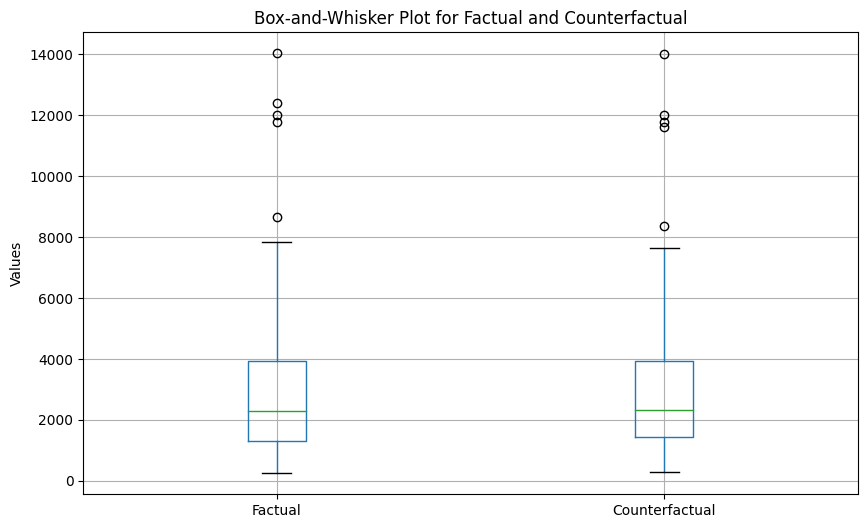

In [27]:
plot_box_whisker(factual=factual, counterfactual=counterfactual, column_name='Credit amount')

In [28]:
factual

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,39,male,2,own,little,Unknown,1473,18,radio/TV,0.072231
1,54,male,2,own,little,little,3051,48,domestic appliances,0.919690
2,27,male,2,own,quite rich,moderate,2326,15,business,0.062517
3,40,male,1,own,little,moderate,1155,12,radio/TV,0.086446
4,36,male,2,own,Unknown,Unknown,3079,36,car,0.153896
...,...,...,...,...,...,...,...,...,...,...
95,30,male,3,own,little,moderate,5965,27,car,0.410081
96,44,male,2,own,quite rich,Unknown,1163,12,car,0.001928
97,29,female,2,rent,rich,moderate,7758,24,car,0.101598
98,37,female,2,rent,little,little,7685,48,business,0.907074


In [29]:
counterfactual

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,39,male,2,own,little,Unknown,1442,17,radio/TV,0.024060
1,54,male,2,own,little,little,3029,48,domestic appliances,0.917797
2,27,male,2,own,quite rich,moderate,2586,14,business,0.036830
3,40,male,1,own,little,moderate,1385,10,radio/TV,0.047721
4,36,male,2,own,Unknown,Unknown,3169,36,car,0.021801
...,...,...,...,...,...,...,...,...,...,...
95,29,male,3,own,little,moderate,5126,26,car,0.167848
96,44,male,2,own,quite rich,Unknown,1169,12,car,0.001874
97,29,female,2,rent,rich,moderate,7636,22,car,0.034854
98,37,female,2,rent,little,little,7654,48,business,0.906850


In [30]:
factual['Risk_state'] = factual['Risk'] > 0.5
counterfactual['Risk_state'] = counterfactual['Risk'] > 0.5

factual['Risk_state'] = factual['Risk_state'].replace({True: 'bad', False: 'good'})
counterfactual['Risk_state'] = counterfactual['Risk_state'].replace({True: 'bad', False: 'good'})

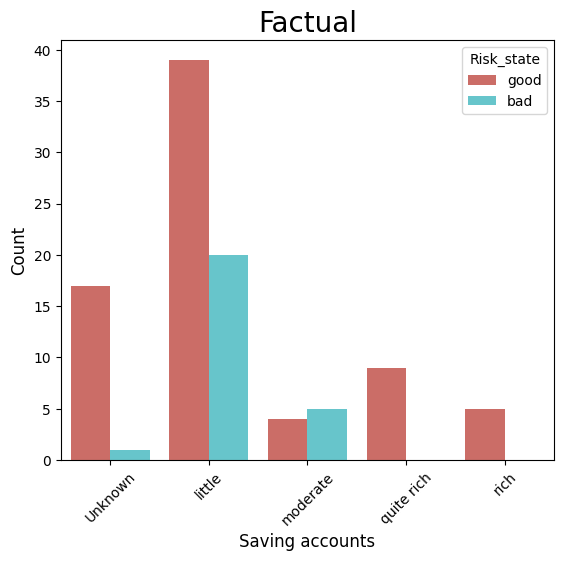

In [72]:
hist_plot(df=factual, x="Saving accounts", hue="Risk_state", title="Factual")

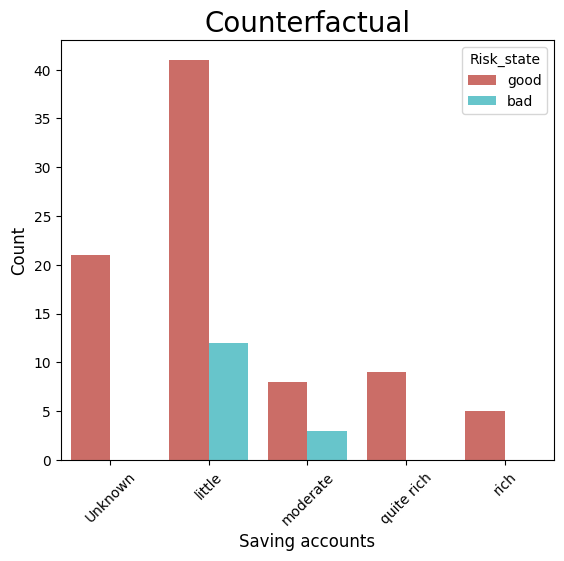

In [73]:
hist_plot(df=counterfactual, x="Saving accounts", hue="Risk_state", title="Counterfactual")

In [33]:
factual_little = factual[factual['Saving accounts'] == 'little']
counterfactual_little = counterfactual[counterfactual['Saving accounts'] == 'little']

In [34]:
factual_little['Risk'].mean(), counterfactual_little['Risk'].mean()

(0.39519174937288143, 0.24830888967924528)

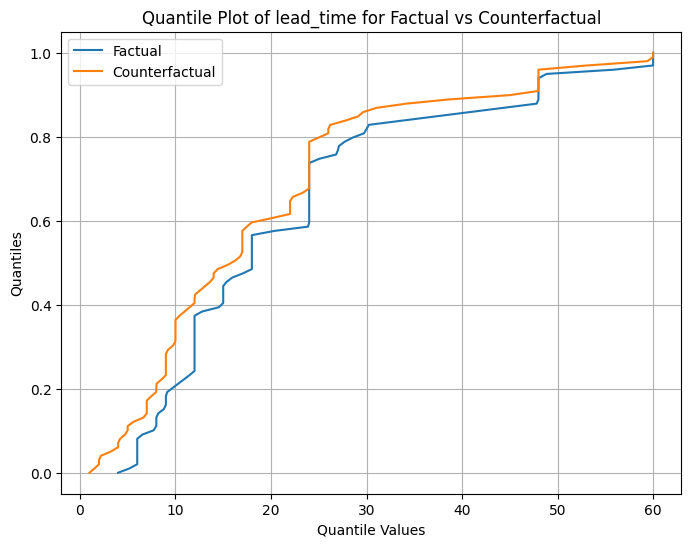

In [178]:
plot_quantile(factual=factual_little, counterfactual=counterfactual_little, column_name='Duration');

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\leiyo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname

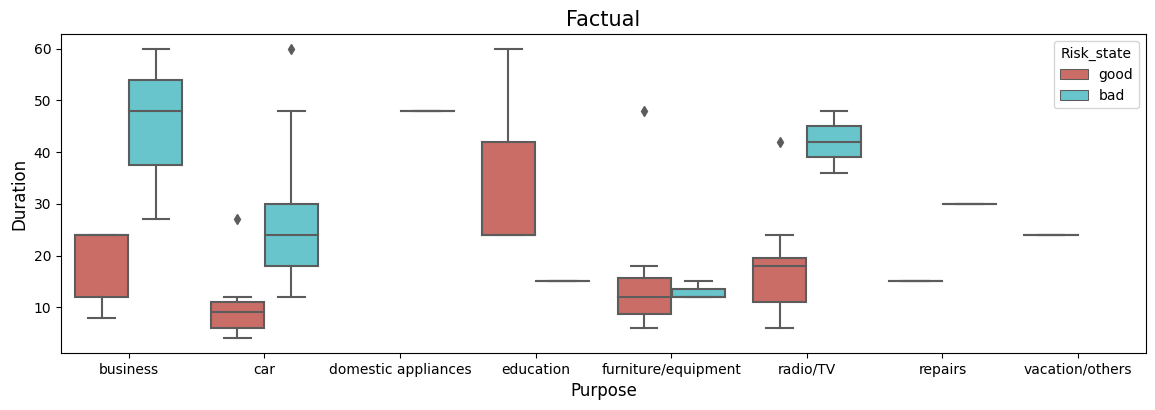

In [36]:
category_box_plot(df=factual_little, x="Purpose", y="Duration", hue="Risk_state", title="Factual")

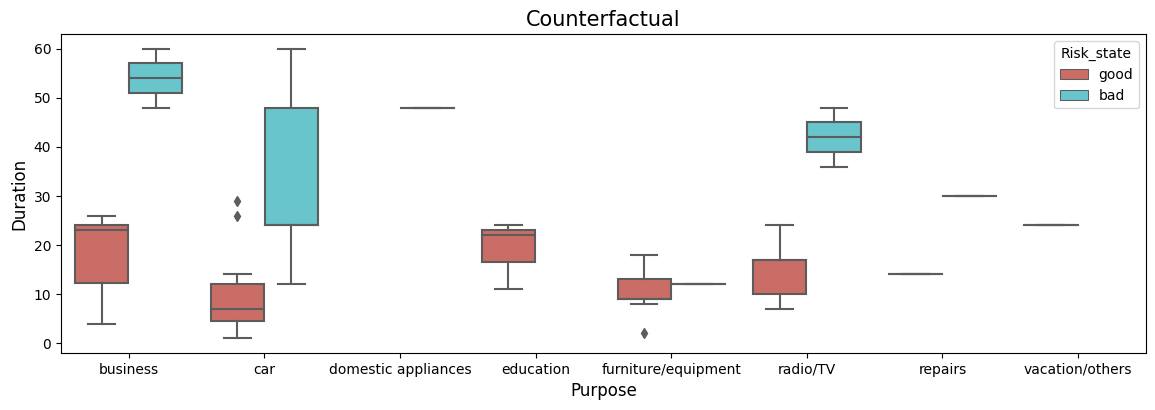

In [37]:
category_box_plot(df=counterfactual_little, x="Purpose", y="Duration", hue="Risk_state", title="Counterfactual")

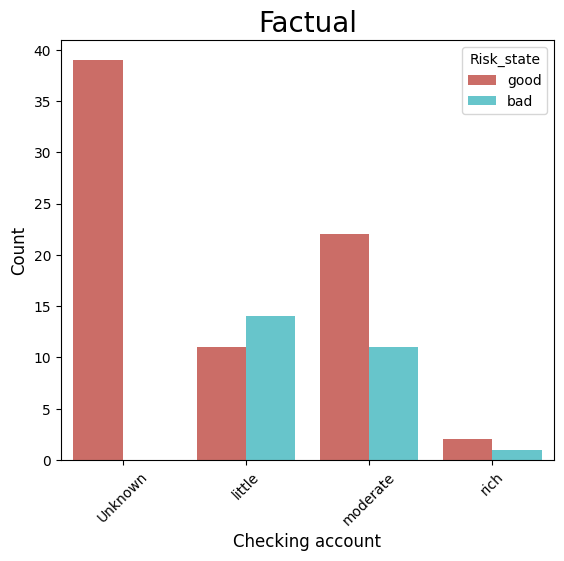

In [38]:
hist_plot(df=factual, x="Checking account", hue="Risk_state", title="Factual")

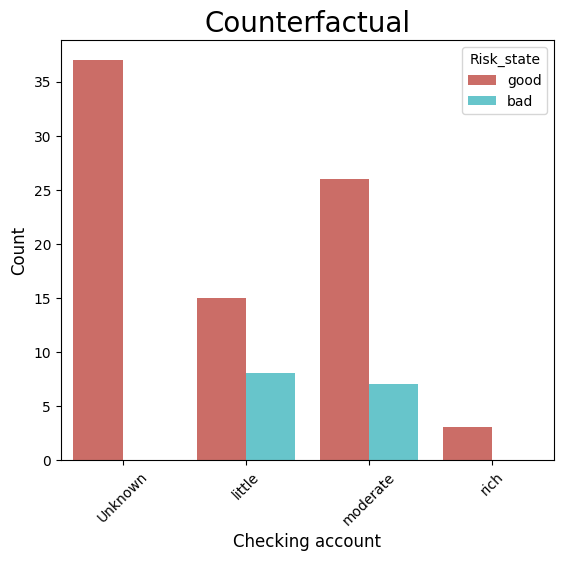

In [39]:
hist_plot(df=counterfactual, x="Checking account", hue="Risk_state", title="Counterfactual")

In [40]:
factual_check_moderate = factual[factual['Checking account']=='moderate']
counterfactual_check_moderate = counterfactual[counterfactual['Checking account']=='moderate']

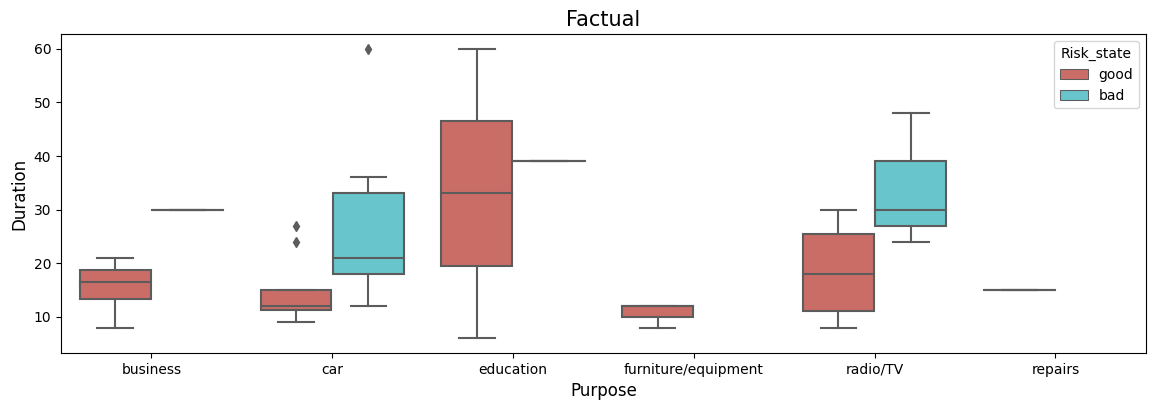

In [41]:
category_box_plot(df=factual_check_moderate, x="Purpose", y="Duration", hue="Risk_state", title="Factual")

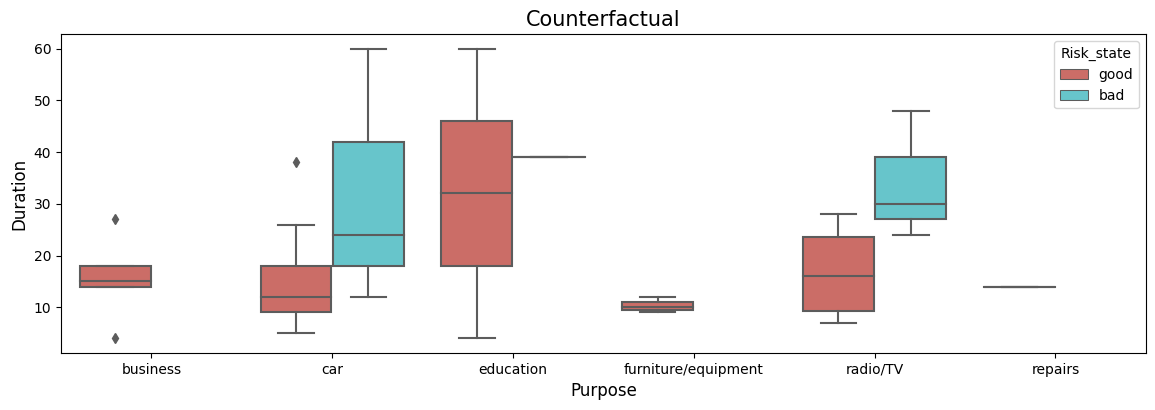

In [42]:
category_box_plot(df=counterfactual_check_moderate, x="Purpose", y="Duration", hue="Risk_state", title="Counterfactual")

In [43]:
factual['Risk'].mean()

0.3130257116629

In [44]:
counterfactual['Risk'].mean()

0.17500146086469998

In [45]:
with open(os.path.join(data_path, 'explainer.pkl'), 'rb') as file:
    explainer = pickle.load(file)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x000001D1D2303280>


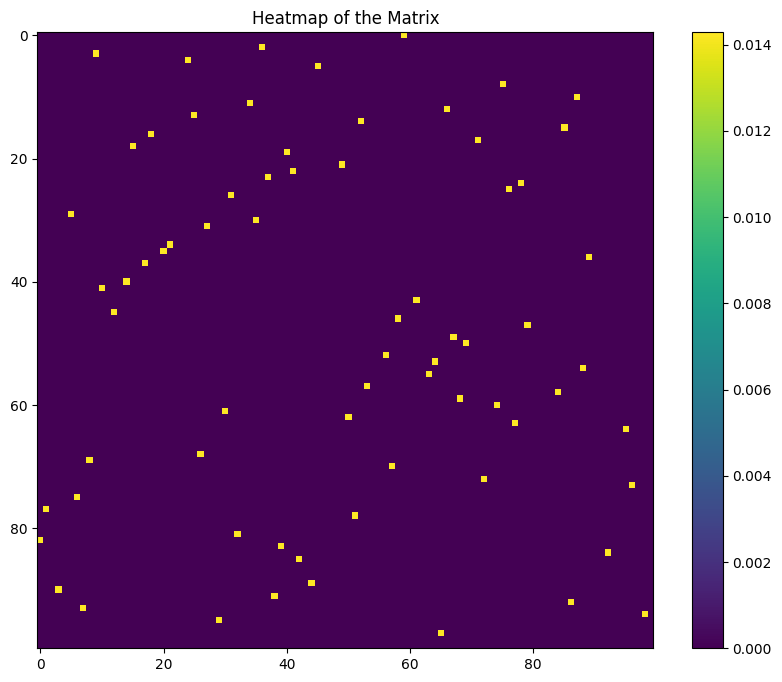

In [46]:
# Sample matrix for demonstration
matrix = explainer.wd.nu.detach().numpy()

plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='viridis')
plt.colorbar()
plt.title("Heatmap of the Matrix")
plt.show()


In [223]:
col_names = []
col_scores = []
for column, col_index in zip(explainer.explain_columns, explainer.explain_indices):

    y_s = torch.FloatTensor(explainer.X[:, col_index])
    y_t = torch.FloatTensor(explainer.X_prime[:, col_index])
    wd_dist, _ = explainer.wd.distance(y_s, y_t, delta=0)

    col_names.append(column)
    col_scores.append(wd_dist.item())

pd.DataFrame({
    'Feature': col_names,
    'Score': col_scores,
}).sort_values(by='Score', ascending=False)

,Feature,Score
4,Saving accounts,0.068774
5,Checking account,0.060398
7,Duration,0.018836
3,Housing,0.010426
8,Purpose,0.010098
1,Sex,0.008110
6,Credit amount,0.007604
2,Job,0.007195
0,Age,0.004521


In [48]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(explainer.X_prime.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
# plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

AttributeError: 'Tensor' object has no attribute 'corr'

<Figure size 1600x600 with 0 Axes>

In [ ]:
explainer.explain_columns

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose']

In [ ]:
explainer.explain_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8]

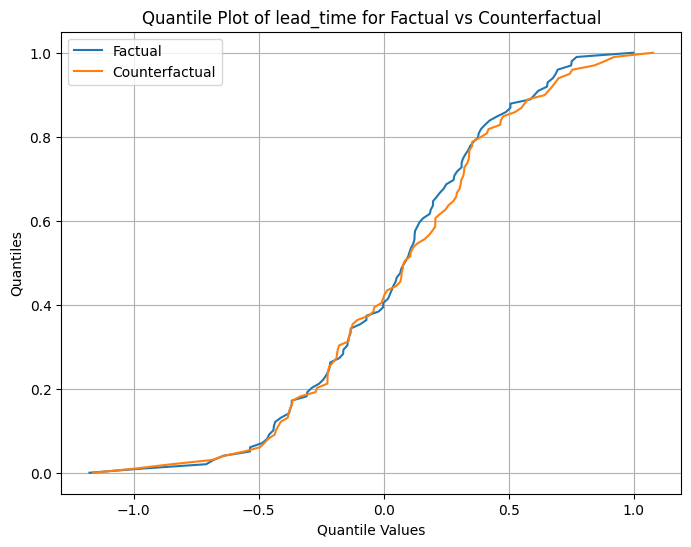

In [ ]:

fa = torch.zeros_like(explainer.X_prime[:, explainer.explain_indices] @ explainer.swd.thetas[0])
dfa = torch.zeros_like(explainer.X_prime[:, explainer.explain_indices] @ explainer.swd.thetas[0])
for theta in explainer.swd.thetas:

    fa += explainer.X_prime[:, explainer.explain_indices] @ theta
    dfa += explainer.best_X[:, explainer.explain_indices] @ theta
    
fa /= len(explainer.swd.thetas)
dfa /= len(explainer.swd.thetas)

plot_quantile(factual=pd.DataFrame({'X': fa}), counterfactual=pd.DataFrame({'X': dfa}), column_name='X')